# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
import numpy as np
%matplotlib inline

In [170]:
df = pd.read_csv('zillow_data.csv')

# Step 2: Data Preprocessing

In [13]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

# Step 3: Reshape from Wide to Long Format

In [171]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName','City', 'State', 'Metro', 'CountyName','RegionID','SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted
#     return melted.groupby('time').aggregate({'value':'mean'})

In [172]:
df = melt_data(df)

In [27]:
df = df[df['State']=='NY']
df.sort_values('value',ascending=False).head()
df['RegionName'].unique()

array([10467, 11226, 11375, ..., 12458, 11749, 13797])

In [141]:
def get_all_column_df(df,col):
    unique_col = df[col].unique()
    list_of_df = []
    for value in unique_col:
        list_of_df.append(pd.DataFrame(df[df[col]==value]))
    return list_of_df

In [143]:
all_states = get_all_column_df(df,'State')


,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,time,value
0,60657,Chicago,IL,Chicago,Cook,84654,1,1996-04-01,334200.0
3,60614,Chicago,IL,Chicago,Cook,84616,4,1996-04-01,498100.0
7,60640,Chicago,IL,Chicago,Cook,84640,8,1996-04-01,216500.0
16,60647,Chicago,IL,Chicago,Cook,84646,17,1996-04-01,122700.0
19,60618,Chicago,IL,Chicago,Cook,84620,20,1996-04-01,142600.0
40,60613,Chicago,IL,Chicago,Cook,84615,41,1996-04-01,297900.0
48,60629,Chicago,IL,Chicago,Cook,84630,49,1996-04-01,93400.0
50,60625,Chicago,IL,Chicago,Cook,84627,51,1996-04-01,148900.0
74,60619,Chicago,IL,Chicago,Cook,84621,75,1996-04-01,76400.0
79,60610,Chicago,IL,Chicago,Cook,84612,80,1996-04-01,435200.0


In [193]:
def big_one(df):
    """takes in a dataframe and returns a dictiony with each key is a state
    and each value is the df containing top 5 zipcodes by projected profit"""
    big_one = {}
    states = get_all_column_df(df,'State')
    narrow_states = narrow_state_scopes(states, '2010', '2018')
    small_states =  limit_dict(narrow_states, 7)
    full_format_states = drop_na_for_dict(small_states)
    for state, df in full_format_states.items():
        big_one[state] = get_top_5_zipcodes_by_profit(df)
    return big_one

In [194]:
big_df = big_one(df)


/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency infor

/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M

/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M

/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS 

/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M

/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M

/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M

/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M

LinAlgError: SVD did not converge

In [155]:
def get_top_5_zipcodes_by_profit(df):
    """Takes in a dataframe of 1 unique state and 
    then returns the top 5 zipcodes based on projected profit"""
    all_zips = get_all_column_df(df,'RegionName')
    set_time_index(all_zips)
    small_dict = narrow_all_scopes(all_zips, '2010', '2018', 'value')
    projected_profits = get_all_proj_profits(small_dict)
    return get_top_5_profits(projected_profits)

In [29]:
all_zips = get_all_column_df(df,'RegionName')

In [33]:
def set_time_index(dfs):
    for df in dfs:
        df.set_index('time',inplace=True)
    return

In [34]:
set_time_index(all_zips)

In [44]:
def narrow_scope(df,start,end,col):
    exdf = pd.DataFrame(df[start:end][col])
    return exdf

In [152]:
def narrow_all_scopes(df_list, start, end, col):
    new_df_list = {}
    for df in df_list:
        zipcode = df['RegionName'][0]
        new_df_list[zipcode] = (narrow_scope(df, start, end, col))
    return new_df_list

In [188]:
def narrow_state_scopes(df_list, start, end):
    """takes in a list of dataframes grouped by state,
        returns a list of dataframes, whose start date colmn are between start and end"""
    new_df_list = {}
    for df in df_list:
        state = df['State'].unique()[0]
        new_df_list[state] = pd.DataFrame(df[(df['time'] > start) & (df['time'] < end)])
    return new_df_list

In [164]:
df_dict = (pd.DataFrame(all_states[0][(all_states[0]['time'] > '2010') & (all_states[0]['time'] < '2018')]))

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,time,value
2444018,60657,Chicago,IL,Chicago,Cook,84654,1,2010-02-01,777800.0
2444021,60614,Chicago,IL,Chicago,Cook,84616,4,2010-02-01,987100.0
2444025,60640,Chicago,IL,Chicago,Cook,84640,8,2010-02-01,628500.0
2444034,60647,Chicago,IL,Chicago,Cook,84646,17,2010-02-01,302800.0
2444037,60618,Chicago,IL,Chicago,Cook,84620,20,2010-02-01,330100.0
2444058,60613,Chicago,IL,Chicago,Cook,84615,41,2010-02-01,750900.0
2444066,60629,Chicago,IL,Chicago,Cook,84630,49,2010-02-01,136400.0
2444068,60625,Chicago,IL,Chicago,Cook,84627,51,2010-02-01,350500.0
2444092,60619,Chicago,IL,Chicago,Cook,84621,75,2010-02-01,133600.0
2444097,60610,Chicago,IL,Chicago,Cook,84612,80,2010-02-01,780300.0


In [160]:
il_narrow = narrow_state_scopes(all_states[0], '2010', '2018')

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,time,value
0,60657,Chicago,IL,Chicago,Cook,84654,1,1996-04-01,334200.0
3,60614,Chicago,IL,Chicago,Cook,84616,4,1996-04-01,498100.0
7,60640,Chicago,IL,Chicago,Cook,84640,8,1996-04-01,216500.0
16,60647,Chicago,IL,Chicago,Cook,84646,17,1996-04-01,122700.0
19,60618,Chicago,IL,Chicago,Cook,84620,20,1996-04-01,142600.0
40,60613,Chicago,IL,Chicago,Cook,84615,41,1996-04-01,297900.0
48,60629,Chicago,IL,Chicago,Cook,84630,49,1996-04-01,93400.0
50,60625,Chicago,IL,Chicago,Cook,84627,51,1996-04-01,148900.0
74,60619,Chicago,IL,Chicago,Cook,84621,75,1996-04-01,76400.0
79,60610,Chicago,IL,Chicago,Cook,84612,80,1996-04-01,435200.0


In [98]:
def limit_dict(d, n):
    c = 0
    new_d = {}
    for key, value in d.items():
        if c == n:
            continue
        ##cal methods that do processes
        new_d[key] = value
        c+=1
    return new_d
        

In [70]:
def find_year_mean(dd,zipcode,year):
    return dd[zipcode][year].mean()

In [192]:
def drop_na_for_dict(df_dict):
    """Params a dictionary filled with dataframes,
        iterate through each df and dropna, then return
        the same dictionary"""
    for df in df_dict.values():
        df.dropna(inplace=True)
    return df_dict

In [ ]:
time_df = df.groupby(['time']).aggregate({'value':'mean'})

In [106]:
small_dict = limit_dict(df_dict, 20)
print(small_dict)

{10467:                value
time                
2010-01-01  328100.0
2010-02-01  327000.0
2010-03-01  326000.0
2010-04-01  326300.0
2010-05-01  327300.0
2010-06-01  330100.0
2010-07-01  334100.0
2010-08-01  335000.0
2010-09-01  333200.0
2010-10-01  331700.0
2010-11-01  321900.0
2010-12-01  310500.0
2011-01-01  310900.0
2011-02-01  320000.0
2011-03-01  324600.0
2011-04-01  324500.0
2011-05-01  320600.0
2011-06-01  315900.0
2011-07-01  312700.0
2011-08-01  311600.0
2011-09-01  311100.0
2011-10-01  310800.0
2011-11-01  311800.0
2011-12-01  310600.0
2012-01-01  306400.0
2012-02-01  301300.0
2012-03-01  298300.0
2012-04-01  295200.0
2012-05-01  294700.0
2012-06-01  297300.0
...              ...
2015-11-01  367100.0
2015-12-01  370800.0
2016-01-01  370700.0
2016-02-01  367600.0
2016-03-01  365800.0
2016-04-01  367200.0
2016-05-01  372200.0
2016-06-01  377300.0
2016-07-01  378000.0
2016-08-01  378300.0
2016-09-01  381100.0
2016-10-01  385400.0
2016-11-01  386000.0
2016-12-01  385300.0
2017-

In [ ]:
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ntime,model='multiplicative')
fig = result.plot()
plot_mpl(fig)

# Step 4: EDA and Visualization
Perform basic EDA as you would building any model, then create at least 3 visualizations.  At least one of the visualizations should have time on the x-axis.  Axes should be labeled and any text should be legible.

In [ ]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

# plt.rc('font', **font)
# # 
# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [73]:
ex = df_dict[10463]

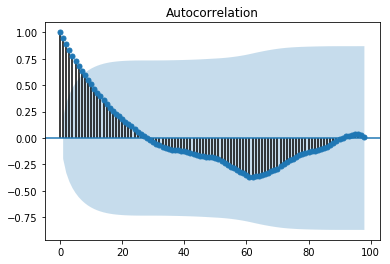

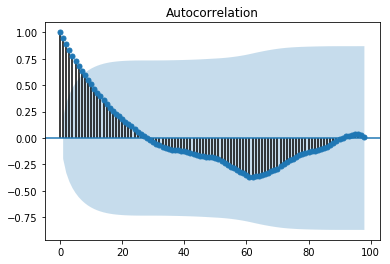

In [74]:
from statsmodels.graphics.tsaplots import plot_acf
#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(ex[:-1], alpha=.05)


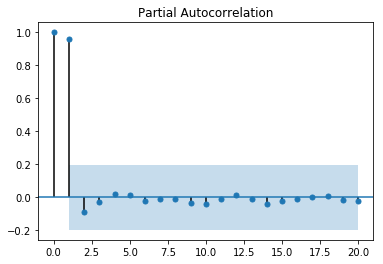

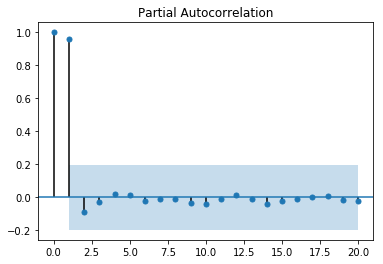

In [75]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ex[:-1], alpha=.05,lags=20)

In [ ]:
data = np.log(time_df['2010':'2018']['value'])

In [ ]:
ndiff = ntime.diff().rename(index=str, columns={"value": "Differenced Observations"})
ndiff2 = ndiff.diff()

In [ ]:
diff = data.diff()
diff2 = diff.diff()

In [ ]:
diff2.dropna(inplace=True)

In [ ]:
#perform dickey fuller to see if our data is stationary
from statsmodels.tsa.stattools import adfuller
test = adfuller(diff2[1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

In [ ]:
diff2.plot.line(figsize=(15,5))

In [ ]:
ntime.dropna(inplace=True)

# Step 5: ARIMA Modeling
Be sure to validate your model.  Make a forecast for the future and describe the trend.

In [76]:
from statsmodels.tsa.arima_model import ARIMA


/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                   97
Model:                ARIMA(10, 2, 1)   Log Likelihood                -925.333
Method:                       css-mle   S.D. of innovations           3227.594
Date:                Thu, 05 Sep 2019   AIC                           1876.666
Time:                        15:47:15   BIC                           1910.138
Sample:                    03-01-2010   HQIC                          1890.201
                         - 03-01-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             147.4985     23.527      6.269      0.000     101.386     193.611
ar.L1.D2.value      1.4199      0.100     14.168      0.000       1.223       1.616
ar.L2.D2.value     -1.3403      

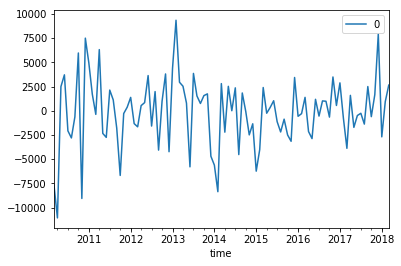

In [77]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(kind='kde')
plt.show()

In [ ]:
model_fit.plot_predict()

In [97]:
list(df_dict)[0:5]

[10467, 11226, 11375, 11235, 10128]

In [133]:
help(model_fit.forecast)

Help on method forecast in module statsmodels.tsa.arima_model:

forecast(steps=1, exog=None, alpha=0.05) method of statsmodels.tsa.arima_model.ARIMAResults instance
    Out-of-sample forecasts
    
    Parameters
    ----------
    steps : int
        The number of out of sample forecasts from the end of the
        sample.
    exog : array
        If the model is an ARIMAX, you must provide out of sample
        values for the exogenous variables. This should not include
        the constant.
    alpha : float
        The confidence intervals for the forecasts are (1 - alpha) %
    
    Returns
    -------
    forecast : array
        Array of out of sample forecasts
    stderr : array
        Array of the standard error of the forecasts.
    conf_int : array
        2d array of the confidence interval for the forecast
    
    Notes
    -----
    Prediction is done in the levels of the original endogenous variable.
    If you would like prediction of differences in levels use `predic

In [94]:
def get_last_value(df):
    return df.tail(1)['value'][0]


In [111]:
def get_projected_profit(df):
    """create arima model from df, then get the forecast36 months later, 
    subtract that from the most recent value, and return"""
    #build Arima model
    model = ARIMA(df[:-1], order=(5,2,1))
    model_fit = model.fit(disp=0)
    
    #get the forecasted for 36 months in future
    future_value = model_fit.forecast(36)[0][-1]
    curr_value = get_last_value(df)
    return future_value - curr_value

In [112]:
def get_all_proj_profits(df_dict):
    """Take in a dictionary of dataframes, where key=zipcode
        Iterate through, determine forecast from ARIMA,
        Subtract from current zipcode, return dictionary of all zipcode scores"""
    
    score_dict = {}
    for zipcode, df in df_dict.items():
        score_dict[zipcode] = get_projected_profit(df)
    return score_dict

In [131]:
def get_top_5_profits(profit_dict):
    """@params a dictionary witht the projected profit margins for zipcodes
        and returns the top 5 as a DF"""
    return pd.DataFrame.from_dict(projected_profits,orient='index',columns=['value']).sort_values('value',ascending=False).head(5)

In [113]:
projected_profits = get_all_proj_profits(small_dict)

/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M

/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:676: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in add
  **kwargs)).imag/2./hess[i, j]
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in multiply
  **kwargs)).imag/2./hess[i, j]
/home/xristsos/anaconda3/lib/python3.7/site-packages/statsmod

In [114]:
projected_profits = projected_profis

In [132]:
get_top_5_profits(projected_profits)

,value
11211,1.613654e+06
11230,8.445689e+05
11226,8.226055e+05
10463,6.730239e+05
10128,5.989950e+05


# Step 6: Interpreting Results
Give a detailed interpretation of results including the relationship between the inputs and output of the model.